In [1]:
from fractran import f_int, FractionGame
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

# Roll up, roll up, and try out FRACTRAN! To whet your appetite, here's PRIMEGAME
(WARNING: rhetorical style shamelessly cribbed from the Conway original, and then abandoned partway through)

In [2]:
HTML("<img src='firstpage.png', width=400>")

## INCREDIBLE! Frankly, almost literally not credible! So let's try it out:

In [3]:
primegame = FractionGame((17, 91),
                         (78, 85),
                         (19, 51),
                         (23, 38),
                         (29, 33),
                         (77, 29),
                         (95, 23),
                         (77, 19),
                         (1, 17),
                         (11, 13),
                         (13, 11),
                         (15, 2),
                         (1, 7),
                         (55, 1), N_0=2)

In [4]:
primegame.run(max_steps=5000)

## As we go through the first 100 steps, the value of the integers we see jumps around, and doesn't seem to have any pattern:

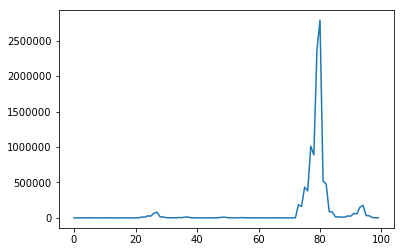

In [5]:
plt.plot(primegame.N[:100])
plt.show()

## Zooming out to 5000 steps, it still seems hard to see how you would extract prime numbers out of any of this:

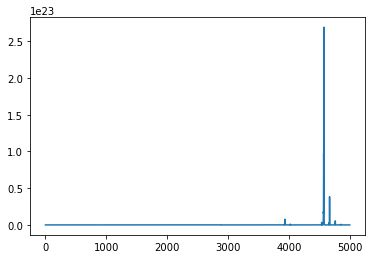

In [6]:
plt.plot(primegame.N)
plt.show()

## And yet, if we take only the values that are powers of 2, in order:

In [7]:
for N_i in primegame.N[1:-1]:
    logbase2 = np.log2(float(N_i))
    if np.floor(logbase2) == logbase2:
        print(int(logbase2))

2
3
5
7
11
13


## JUST LIKE MAGIC!

## What's more, it was created by veteran mathematicomputational inventor, *John Horton Conway*!
See what he has to say:

> ## Only FRACTRAN Has These Star Qualities.
> - Makes workday really easy!
    - FRACTRAN needs no complicated programming manual - its entire
syntax can be learned in 10 seconds, and programs for quite complicated
and interesting functions can be written almost at once.
> - Gets those functions really clean!
    - The entire configuration of a FRACTRAN machine at any instant is
held as a single integer - there are no messy "tapes" or other foreign concepts to be understood by the fledgling programmer.
> - Matches any machine on the market!
    - Your old machines (Turing, etc.) can quite easily be made to simulate arbitrary FRACTRAN programs, and it is usually even easier to write a FRACTRAN program to simulate other machines.
> - Astoundingly simple universal program!
    - By making a FRACTRAN program that simulates an arbitrary other FRACTRAN program, we have obtained the simple universal FRACTRAN program described in Theorem 3. 

## So buy today!
Oh, you want to know how it works? An informed consumer, I like that!

Let's scale back a bit, and try the simplest useful example of a FRACTRAN program: destructively add together 2 numbers.

The program is just: 2/3

When you start this program with 2<sup>a</sup>⋅3<sup>b</sup>, you stop with 2<sup>a+b</sup>

In [8]:
a = 2
b = 3
sumgame = FractionGame((2, 3), N_0=(2**a)*(3**b))

In [9]:
sumgame.run()

Result?

In [10]:
f_int(sumgame.N[-2])

2^5

## What was the internal state of this program at each step in the process?

In [11]:
sumgame

2^2 * 3^3
*2/3 (A)
2^3 * 3^2
*2/3 (A)
2^4 * 3^1
*2/3 (A)
2^5

We start with 2<sup>2</sup>⋅3<sup>3</sup>.

At each step of the program, if it can, the interpreter chooses the only fraction available to it, 2/3.

This transition effectively increases the number of 2s in the memory at the same time as decreasing the number of 3s. Because 2 and 3 are coprime (being prime), we can be sure that we do not confuse the two.

When the number of 3s is exhausted, we cannot get an integer by multiplying with any of the fractions available, so we halt.

In effect, we are treating each prime factor of the current integer as a register, and each fraction is an instruction to increase and decrease register values by a certain amount.

Let's make this clear by compiling to a python program that is more obviously a register machine:

## SUMGAME, viewed as a python register machine

In [12]:
print(sumgame.python_equivalent(max_steps=100))

# Starting conditions
registers = {}
registers[2] = 2
registers[3] = 3

# Main Loop
counter = 0
while sum(registers.values()) > 0:
	counter += 1
	if (registers[3] >= 1): # fraction A (2/3)
		registers[3] -= 1
		registers[2] += 1
	else:
		registers.clear()
	print(' * '.join([str(factor) + '^' + str(registers[factor]) for factor in registers.keys()]))
	if counter > 100:
		break


Let's just check that the sequence of internal states is the same as when we were directly interpreting the FRACTRAN program:

In [13]:
exec(sumgame.python_equivalent(max_steps=100))

2^3 * 3^2
2^4 * 3^1
2^5 * 3^0



So, we see that what FRACTRAN is essentially doing is checking if given registers are zero, and then increasing and decreasing registers as a result. Recall that the instruction set for Minsky's counter machine (which is known to be Turing complete) is INC(r, x) and JZDEC(r, x, y), so if you squint a bit...

Minsky Counter Machine | FRACTRAN
-|-
line z: INC r, GOTO line x | r*x/z
line z: IF r is zero, GOTO line x, ELSE DEC r, GOTO line y | y/(r*z), x/z

OK, that was handwavy. Observe in particular how I have snuck in the concept of line numbers, when no such thing has been explained so far. Essentially we designate unused registers to emulate a multi-line program - for full details see original paper.

However, there's a better, and more surprising way to show Turing completeness:

## POLYGAME; or Cantor Diagonalisation Soup for the Gödelian Soul

In [14]:
c = 37485
n = 2
polygame = FractionGame((583, 559),
                        (629, 551),
                        (437, 527),
                        (82, 517),
                        (615, 329),
                        (371, 129),
                        (1, 115),
                        (53, 86),
                        (43, 53),
                        (23, 47),
                        (341, 46),
                        (41, 43),
                        (47, 41),
                        (29, 37),
                        (37, 31),
                        (37, 31),
                        (299, 29),
                        (47, 23),
                        (161, 15),
                        (527, 19),
                        (159, 7),
                        (1, 17),
                        (1, 13),
                        (1, 3),
                        N_0=c*2**(2**n))

Just 24 fractions, and yet, if you start at c⋅2<sup>2^n</sup>, the program will stop at 2<sup>2^m</sup>. Now, if we let c iterate through all positive integers...

f<sub>c</sub>(n) = m is then a list of every computable function!

It took Gödel 25 pages to map every integer to a logical statement! (WARNING: HYPERBOLE)

Not only that, some interesting functions appear at relatively low, semantically meaningful c. Conway provides a catalogue with some examples:

 c | All defined values of f_c 
---|----------------------------
 0 | none
 1 | n->n
2 | 0->1
4 | 0->2
8 | 1->2
16 | 2->3
64 | 1->3
77 | n->0
128 | 0->3
133 | 0->0
255 | n+1->n+1
256 | 3->4
847 | n->1
37485 | 0->0, n+1->n
2268945 | n->n+1
2<sup>k</sup> | a->b if 2<sup>b</sup> - 2<sup>a</sup> = k
7 * 11<sup>2^k</sup> | n->k
15/7 * 1029<sup>2^(k-1)</sup> | n->n+k

Of course, not every function has a low c.
In the paper, Conway provides the (absurdly large) value of c which yields the function f(n) -> nth digit of pi:

In [15]:
HTML("<img src='c_pi.png', width=400>")

This is, as Conway says, an astoundingly simple universal program! If you're curious how it actually works, see Theorem 3 of the original paper, which is very accessible!

## Full circle
OK, if we have time, let's go back to PRIMEGAME and see if we can understand it a bit (this will overflow the slide, but it doesn't really matter)

In [16]:
print(primegame.python_equivalent())

# Starting conditions
registers = {}
registers[2] = 1
registers[3] = 0
registers[5] = 0
registers[7] = 0
registers[11] = 0
registers[13] = 0
registers[17] = 0
registers[19] = 0
registers[23] = 0
registers[29] = 0

# Main Loop
counter = 0
while sum(registers.values()) > 0:
	counter += 1
	if (registers[7] >= 1) & (registers[13] >= 1): # fraction A (17/91)
		registers[7] -= 1
		registers[13] -= 1
		registers[17] += 1
	elif (registers[5] >= 1) & (registers[17] >= 1): # fraction B (78/85)
		registers[5] -= 1
		registers[17] -= 1
		registers[2] += 1
		registers[3] += 1
		registers[13] += 1
	elif (registers[3] >= 1) & (registers[17] >= 1): # fraction C (19/51)
		registers[3] -= 1
		registers[17] -= 1
		registers[19] += 1
	elif (registers[2] >= 1) & (registers[19] >= 1): # fraction D (23/38)
		registers[2] -= 1
		registers[19] -= 1
		registers[23] += 1
	elif (registers[3] >= 1) & (registers[11] >= 1): # fraction E (29/33)
		registers[3] -= 1
		registers[11] -= 1
		registers[29] += 1
	elif (reg

In [17]:
# Enough steps to run through one entire cycle
# Start with n=1, increment to n=2, check d=1,
# find that 2 is divisible by 1, conclude that 2 is prime,
# (if we let it continue running, next step would be to increment to n=3)
primegame.run(N_0=2, max_steps=20)
primegame

2^1
*15/2 (L)
3^1 * 5^1
*55/1 (N)
3^1 * 5^2 * 11^1
*29/33 (E)
5^2 * 29^1
*77/29 (F)
5^2 * 7^1 * 11^1
*13/11 (K)
5^2 * 7^1 * 13^1
*17/91 (A)
5^2 * 17^1
*78/85 (B)
2^1 * 3^1 * 5^1 * 13^1
*11/13 (J)
2^1 * 3^1 * 5^1 * 11^1
*29/33 (E)
2^1 * 5^1 * 29^1
*77/29 (F)
2^1 * 5^1 * 7^1 * 11^1
*13/11 (K)
2^1 * 5^1 * 7^1 * 13^1
*17/91 (A)
2^1 * 5^1 * 17^1
*78/85 (B)
2^2 * 3^1 * 13^1
*11/13 (J)
2^2 * 3^1 * 11^1
*29/33 (E)
2^2 * 29^1
*77/29 (F)
2^2 * 7^1 * 11^1
*13/11 (K)
2^2 * 7^1 * 13^1
*17/91 (A)
2^2 * 17^1
*1/17 (I)
2^2
*15/2 (L)

*15/2 (L)

## The action of PRIMEGAME

Eratosthenes? More like Eratosthe-naive!

In [18]:
HTML("<img src='primegame.png', width=300>")

n is the number we are checking for primeness, and d is the divisor we are checking.

We have 5<sup>n</sup>⋅7<sup>d</sup>⋅13 (the first example of this in the above is step 6, (5<sup>2</sup>⋅7<sup>1</sup>⋅13))

which is transformed via several successive multiplications to:

2<sup>n</sup>⋅3<sup>r</sup>⋅7<sup>d-r-1</sup>⋅17

Then, we have a fork.

- If r > 0:

    this means that the current number will be divisible by (3 * 17), so the C transition can occur. This is followed by some other multiplications, until we have:
    
    5<sup>n</sup>⋅7<sup>d-1</sup>⋅13
    
    Which is the same as the starting number, except d is decreased by 1, so we start again and check the next potential divisor.

- If r = 0, meaning that a divisor for n has been found:

    then the current number is not divisible by (3 * 17), so C cannot happen. However, it is divisible by 17, so I can happen, yielding:
    
    2<sup>n</sup>⋅7<sup>d-1</sup> (START HERE WITH n=1, d=1)
    
    If n is prime, then d will be 1, meaning that the 7 term is 7<sup>0</sup>=1, and the number we have in memory at this point is a power of 2. If n is not prime, the 7 term is greater than 1, so the number in memory is not a power of 2.
    
    Some other transitions occur, and we get:
    
    5<sup>n+1</sup>⋅7<sup>n</sup>⋅13 

We can start again with new_n = n+1 and d = new_n-1.

## Further reading

I've kept you here under false pretenses.
I don't know why you've all listened to me explaining it, when you could have been listening to Conway himself: https://www.uctv.tv/shows/Fractran-A-Ridiculous-Logical-Language-with-John-Conway-23320

or reading the original paper, which is delightfully whimsical:
https://dx.doi.org/10.1007/978-1-4612-4808-8_2

or reading this illustrated popsci explanation of PRIMEGAME in particular:
https://www.jstor.org/stable/2690263

Minsky on computability:
https://www.jstor.org/stable/1970290

FRACTRAN in FRACTRAN:
https://github.com/jbeder/fractran (but where is the quine?)

This repository, if you want to play with my implementation for some reason
https://github.com/chigozienri/fractran